In [310]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
url_CountyTotals = "https://www.texasspeleologicalsurvey.org/deeplong/countytotals.php"

In [312]:
#select the relevant table using indexing
df_CountyTotals = pd.read_html(url_CountyTotals,header=0)[1]

In [313]:
# tidy the dataframe
# The structure Wickham defines as tidy has the following attributes:
# 1. Each variable forms a column and contains values
# 2. Each observation forms a row
# 3. Each type of observational unit forms a table

# drop the total column
df_CountyTotals = df_CountyTotals.drop('Total', axis=1)
# stack the non-county colums to a variable
df_CountyTotals.head()

,County,Caves,Sinks/Cavities,Shelters,Springs,Undefined
0,Armstrong,6,0,0,5,0
1,Atascosa,1,0,0,0,0
2,Bandera,74,19,0,169,6
3,Bell,276,737,425,152,3
4,Bexar,605,1022,19,84,7


In [314]:
# Melting
id_vars = ['Caves', 'Sinks/Cavities', 'Shelters', 'Springs',
       'Undefined']
# melting “Unpivots” a DataFrame from wide format to long format
df_karsts_formated = pd.melt(frame=df_CountyTotals,id_vars=['County'],value_vars=id_vars,var_name="Type",value_name="Count")
df_karsts_formated.head()

,County,Type,Count
0,Armstrong,Caves,6
1,Atascosa,Caves,1
2,Bandera,Caves,74
3,Bell,Caves,276
4,Bexar,Caves,605


In [315]:
df_caves_formated = df_CountyTotals_formated[df_CountyTotals_formated['Type']=='Caves']
df_caves_formated.head()

,County,Type,Count
0,Armstrong,Caves,6
1,Atascosa,Caves,1
2,Bandera,Caves,74
3,Bell,Caves,276
4,Bexar,Caves,605


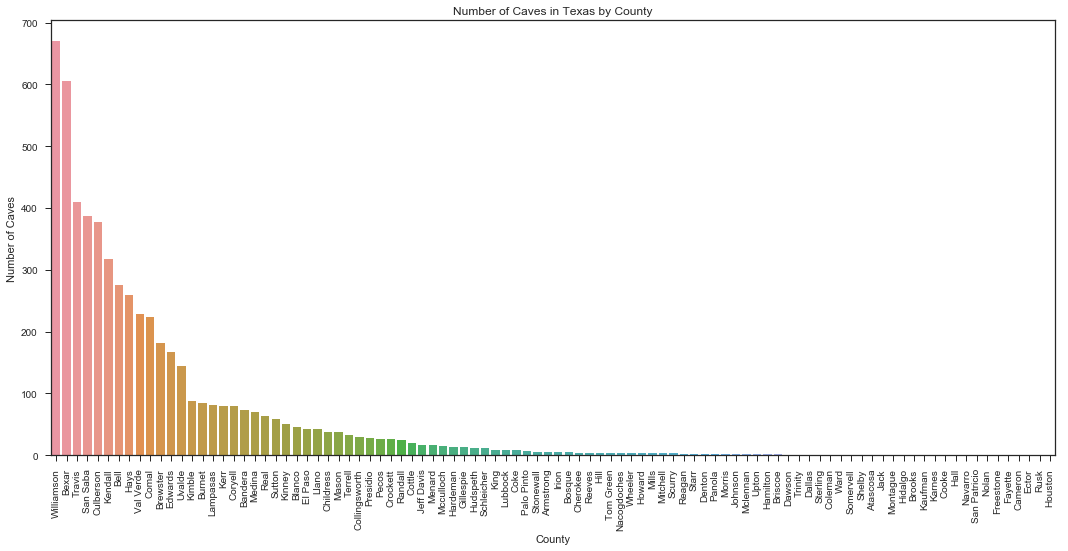

In [316]:
# Visualize the Number of Caves by County in Texas
df_by_county = df_caves_formated.groupby('County').agg(np.sum).reset_index()
df_by_county = df_by_county.sort_values(by='Count',ascending=False)
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_by_county['County'],y=df_by_county['Count'])
_ = plt.title("Number of Caves in Texas by County")
_ = plt.ylabel("Number of Caves")

for tick in ax.get_xticklabels():
    tick.set_rotation(90) 

plt.savefig('../Resouces/images/14jan2017/image1.png')
plt.show();

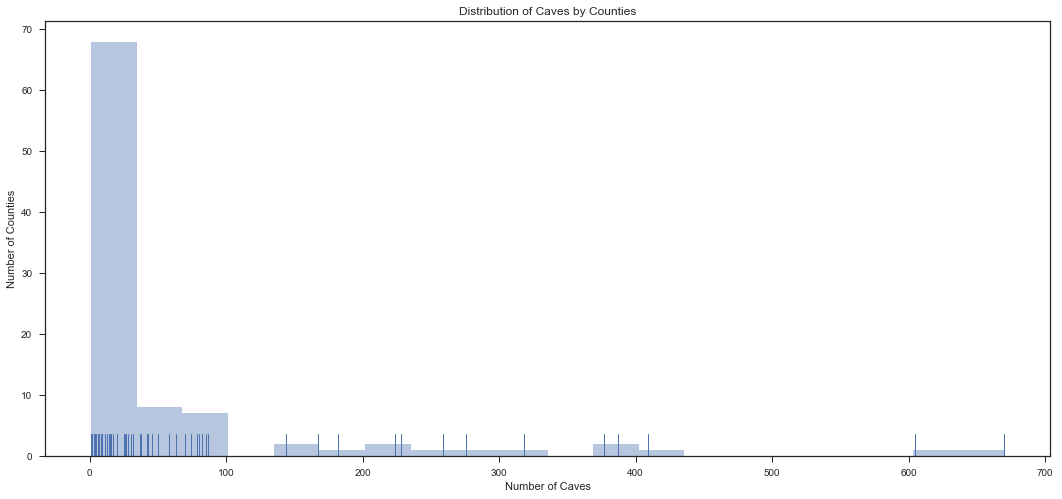

In [317]:
plt.figure(figsize=(18,8))
sns.distplot(df_by_county['Count'], bins=20, kde=False, rug=True);
_ = plt.title("Distribution of Caves by Counties")
_ = plt.ylabel("Number of Counties")
_ = plt.xlabel("Number of Caves")
plt.savefig('../Resouces/images/14jan2017/image2.png')
plt.show();

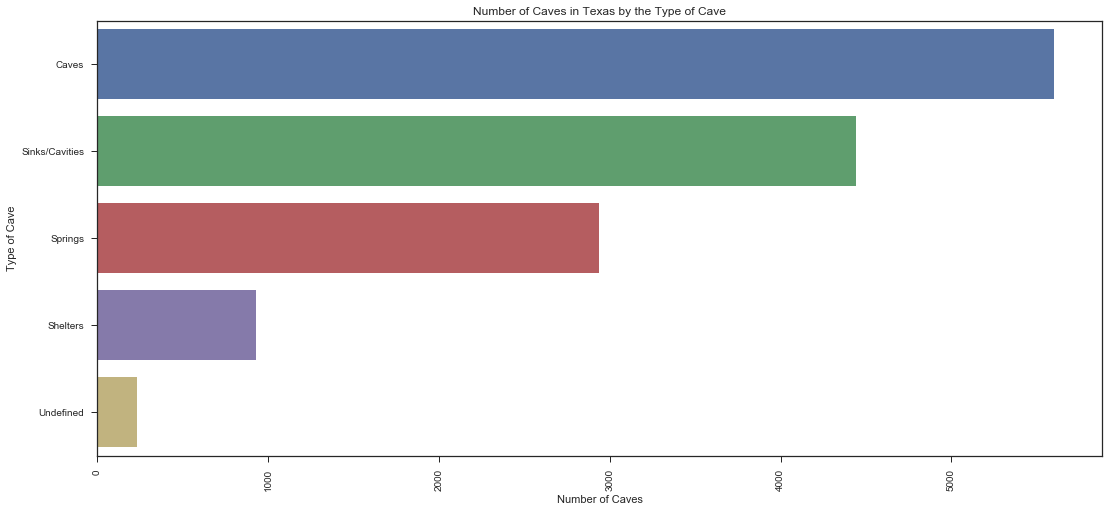

In [318]:
# Visualize the Number of Caves by County in Texas
df_by_cavetype = df_karsts_formated.groupby('Type').agg(np.sum).reset_index()
df_by_cavetype = df_by_cavetype.sort_values(by='Count',ascending=False)
plt.figure(figsize=(18,8))
ax = sns.barplot(y=df_by_cavetype['Type'],x=df_by_cavetype['Count'])
_ = plt.title("Number of Caves in Texas by the Type of Cave")
_ = plt.xlabel("Number of Caves")
_ = plt.ylabel("Type of Cave")

for tick in ax.get_xticklabels():
    tick.set_rotation(90) 

plt.savefig('../Resouces/images/14jan2017/image3.png')
plt.show();

In [319]:
# long and deep cave analysis - its not a random sample
url_deepcave = "https://www.texasspeleologicalsurvey.org/deeplong/deepcaves.php"
url_longcave = "https://www.texasspeleologicalsurvey.org/deeplong/longcaves.php"

In [320]:
#select the relevant table using indexing
df_deepcave = pd.read_html(url_deepcave,header=0)[1]
df_longcave = pd.read_html(url_longcave,header=0)[1]

In [321]:
display(df_deepcave.head())
display(df_deepcave.shape)
display(df_longcave.head())
display(df_longcave.shape)

,Rank,Cave Name,County,Cave Length,Cave Depth
0,1,Sorcerer's Cave,Terrell,"3,510.00 H",173.7
1,2,Phantom Lake Spring Cave,Jeff Davis,"3,032.50 T",150.3
2,3,Wizard's Well Cavern,Terrell,"2,007.10 H",118.3
3,4,Goodenough Springs,Val Verde,178.00 T,114.9
4,5,Devil's Sinkhole,Edwards,329.50 T,107.0


(138, 5)

,Rank,Cave Name,County,Cave Length,Cave Depth
0,1,Honey Creek Cave,Comal,"33,295.00 T",37.9
1,2,Powell's Cave-Neel's Cave System,Menard,"26,145.50 T",24.0
2,3,Perry Water Cave,Real,"9,731.50 T",27.0
3,4,Amazing Maze,Pecos,"6,917.00 T",22.3
4,5,Inner Space Cavern,Williamson,"6,114.70 H",21.0


(142, 5)

In [322]:
frames = [df_deepcave, df_longcave]

In [323]:
df_cavemerge = pd.concat(frames)

In [324]:
# concat the two dataframe and remove duplicates
display(df_cavemerge.head())
display(df_cavemerge.shape)

,Rank,Cave Name,County,Cave Length,Cave Depth
0,1,Sorcerer's Cave,Terrell,"3,510.00 H",173.7
1,2,Phantom Lake Spring Cave,Jeff Davis,"3,032.50 T",150.3
2,3,Wizard's Well Cavern,Terrell,"2,007.10 H",118.3
3,4,Goodenough Springs,Val Verde,178.00 T,114.9
4,5,Devil's Sinkhole,Edwards,329.50 T,107.0


(280, 5)

In [325]:
# drop duplicates
df_cavemerge = df_cavemerge.drop_duplicates('Cave Name',keep='first')
display(df_cavemerge.head())
display(df_cavemerge.shape)

,Rank,Cave Name,County,Cave Length,Cave Depth
0,1,Sorcerer's Cave,Terrell,"3,510.00 H",173.7
1,2,Phantom Lake Spring Cave,Jeff Davis,"3,032.50 T",150.3
2,3,Wizard's Well Cavern,Terrell,"2,007.10 H",118.3
3,4,Goodenough Springs,Val Verde,178.00 T,114.9
4,5,Devil's Sinkhole,Edwards,329.50 T,107.0


(227, 5)

In [326]:
# Tidy the Cave Length column
df_cavemerge['Cave Length']=df_cavemerge['Cave Length'].str.split(expand=True)[0]
df_cavemerge['Cave Length']=df_cavemerge['Cave Length'].str.replace(',', '')
df_cavemerge['Cave Length'] = pd.to_numeric(df_cavemerge['Cave Length'])
display(df_cavemerge.head())
display(df_cavemerge.shape)
display(df_cavemerge.info())

,Rank,Cave Name,County,Cave Length,Cave Depth
0,1,Sorcerer's Cave,Terrell,3510.0,173.7
1,2,Phantom Lake Spring Cave,Jeff Davis,3032.5,150.3
2,3,Wizard's Well Cavern,Terrell,2007.1,118.3
3,4,Goodenough Springs,Val Verde,178.0,114.9
4,5,Devil's Sinkhole,Edwards,329.5,107.0


(227, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 141
Data columns (total 5 columns):
Rank           227 non-null int64
Cave Name      227 non-null object
County         227 non-null object
Cave Length    227 non-null float64
Cave Depth     227 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.6+ KB


None

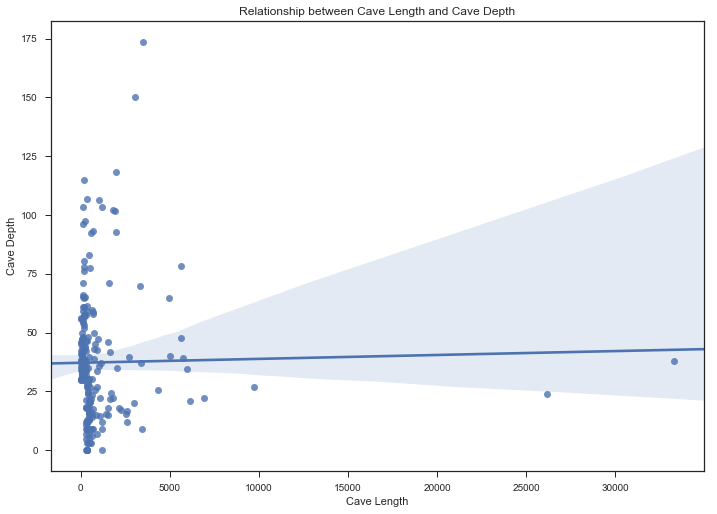

In [327]:
sns.regplot(x=df_cavemerge['Cave Length'], y=df_cavemerge['Cave Depth'])
plt.title("Relationship between Cave Length and Cave Depth")
plt.savefig('../Resouces/images/14jan2017/image4.png')
plt.show();

In [329]:
df_cavemerge

,Rank,Cave Name,County,Cave Length,Cave Depth
0,1,Sorcerer's Cave,Terrell,3510.00,173.70
1,2,Phantom Lake Spring Cave,Jeff Davis,3032.50,150.30
2,3,Wizard's Well Cavern,Terrell,2007.10,118.30
3,4,Goodenough Springs,Val Verde,178.00,114.90
4,5,Devil's Sinkhole,Edwards,329.50,107.00
5,6,Langtry Lead Cave,Val Verde,1053.10,106.20
6,7,Plateau Cave,Culberson,140.00,103.60
7,8,H.T. Miers Cave,Val Verde,1202.10,103.30
8,9,Blowhole Cave,Edwards,1839.00,102.30
9,10,O-9 Well,Crockett,1949.00,101.90
